### Import required modules

In [17]:
from ggplot import *
import pandas as pd

### BRICS GDP Numbers

### Read in the data
* data courtesy investing.com

In [18]:
crude = pd.read_csv("data-crude-price-daily.csv")

### Exploring the data set

In [19]:
crude.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Nov 09, 2017",56.88,56.86,56.98,56.70,0,0.02
1,"Nov 08, 2017",56.87,57.03,57.91,56.42,0,-0.58
2,"Nov 07, 2017",57.20,57.27,57.69,56.83,750.19K,-0.26
3,"Nov 06, 2017",57.35,55.97,57.61,55.66,861.71K,2.70
4,"Nov 05, 2017",55.84,55.90,55.97,55.80,0,0.36


In [20]:
crude.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1582 entries, 0 to 1581
Data columns (total 7 columns):
Date        1582 non-null object
Price       1582 non-null float64
Open        1582 non-null float64
High        1582 non-null float64
Low         1582 non-null float64
Vol.        1582 non-null object
Change %    1582 non-null float64
dtypes: float64(5), object(2)
memory usage: 86.6+ KB


### Transform data

In [21]:
crude['Date'] = pd.to_datetime(crude['Date'])

In [22]:
crude.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1582 entries, 0 to 1581
Data columns (total 7 columns):
Date        1582 non-null datetime64[ns]
Price       1582 non-null float64
Open        1582 non-null float64
High        1582 non-null float64
Low         1582 non-null float64
Vol.        1582 non-null object
Change %    1582 non-null float64
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 86.6+ KB


### Visualizing Crude Price

In [23]:
p = ggplot(aes(x='Date', y='Price'), data=crude)

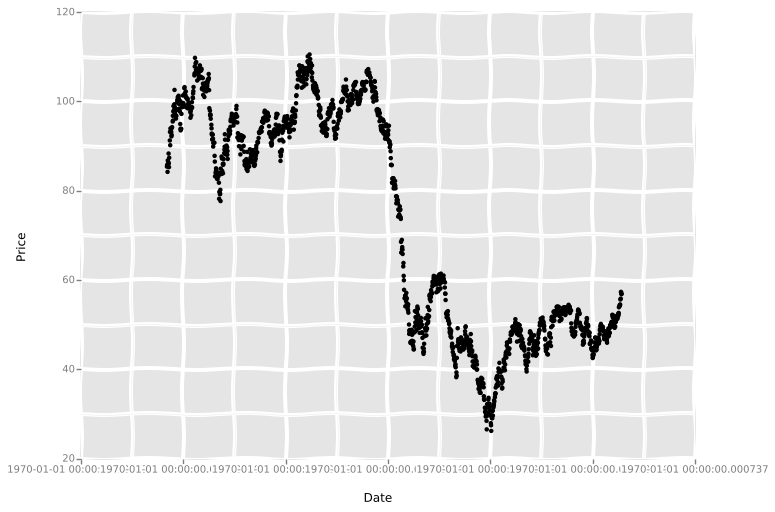

<ggplot: (-9223363286194295324)>

In [24]:
p  + geom_point()

/home/nbuser/anaconda3_410/lib/python3.5/site-packages/ggplot/stats/stat_smooth.py:77: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  smoothed_data = smoothed_data.sort('x')


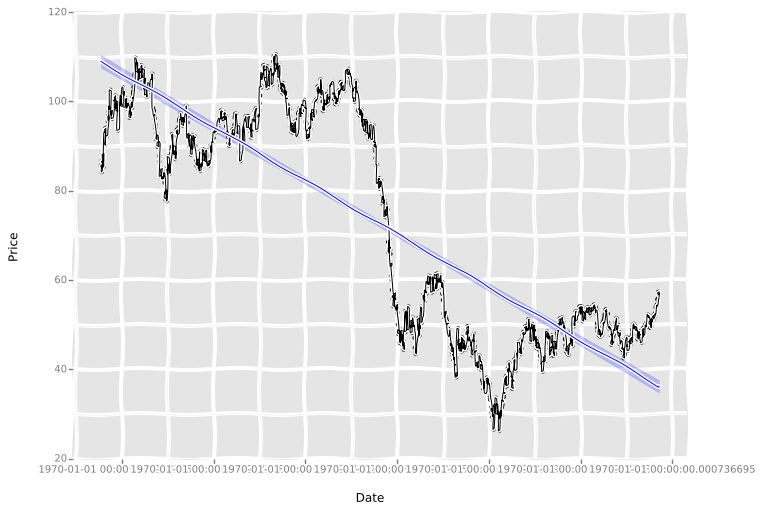

<ggplot: (-9223363286194295324)>

In [25]:
p + geom_line() + stat_smooth(color='blue')

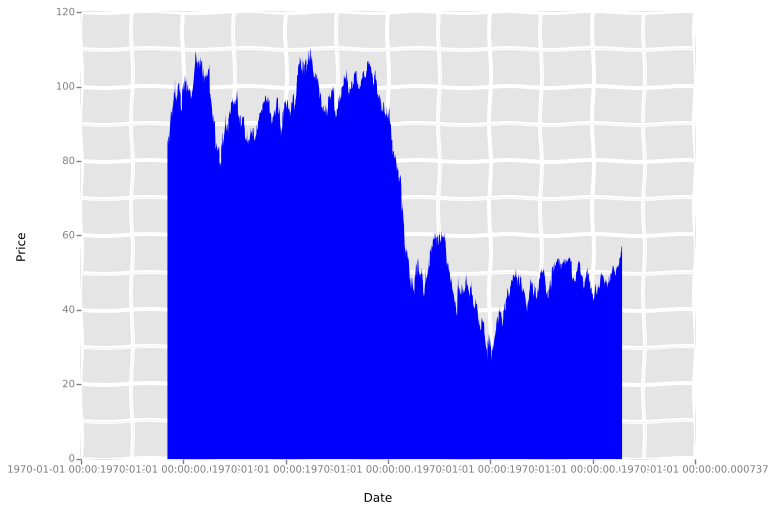

<ggplot: (8750661343671)>

In [26]:
ggplot(aes(x='Date', y='Price'), data=crude) +\
    geom_area(fill = 'blue')

### Visualizing Price Change

In [27]:
crude.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2017-11-09,56.88,56.86,56.98,56.70,0,0.02
1,2017-11-08,56.87,57.03,57.91,56.42,0,-0.58
2,2017-11-07,57.20,57.27,57.69,56.83,750.19K,-0.26
3,2017-11-06,57.35,55.97,57.61,55.66,861.71K,2.70
4,2017-11-05,55.84,55.90,55.97,55.80,0,0.36


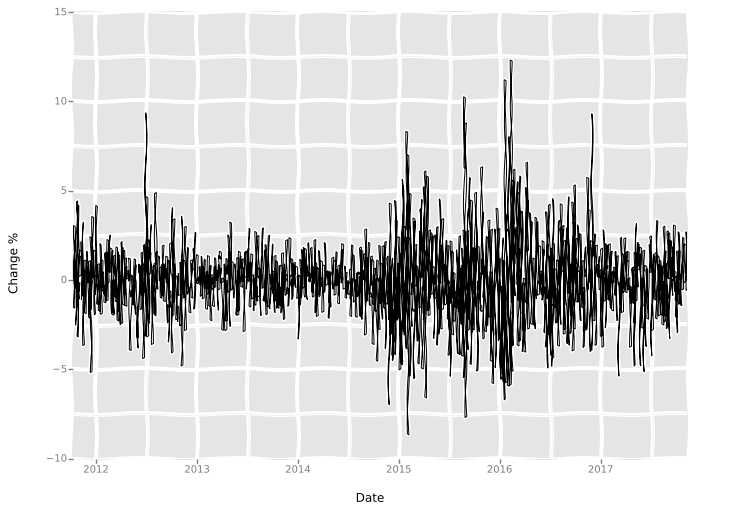

<ggplot: (-9223363286194307335)>

In [28]:
ggplot(aes(x='Date', y='Change %'), data=crude) +\
    geom_line()

### Plotting 50 day moving average

In [29]:
crude.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2017-11-09,56.88,56.86,56.98,56.70,0,0.02
1,2017-11-08,56.87,57.03,57.91,56.42,0,-0.58
2,2017-11-07,57.20,57.27,57.69,56.83,750.19K,-0.26
3,2017-11-06,57.35,55.97,57.61,55.66,861.71K,2.70
4,2017-11-05,55.84,55.90,55.97,55.80,0,0.36


In [30]:
crude['Moving Average 50 Days'] = crude.Price.rolling(window=50).mean()

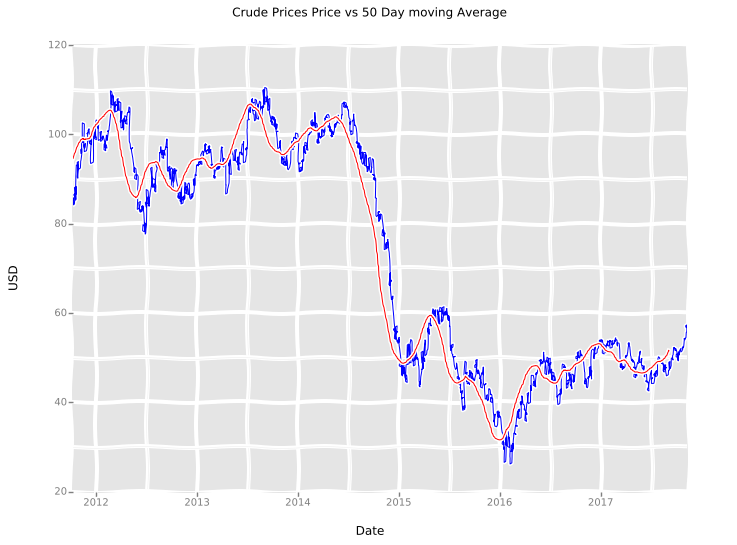

<ggplot: (-9223363286193489576)>

In [31]:
ggplot(aes(x='Date'), data=crude) +\
    geom_line(aes(y='Price'), color='blue') +\
    geom_line(aes(y='Moving Average 50 Days'), color='red') +\
    xlab("Date") + ylab("USD") + ggtitle("Crude Prices Price vs 50 Day moving Average")

/home/nbuser/anaconda3_410/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


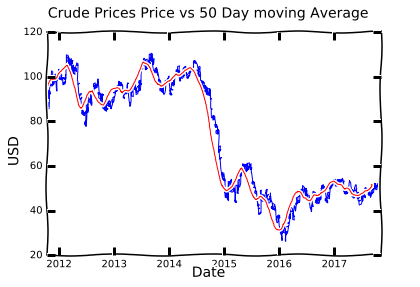

<ggplot: (8750661280723)>

In [32]:
ggplot(aes(x='Date'), data=crude) +\
    geom_line(aes(y='Price'), color='blue') +\
    geom_line(aes(y='Moving Average 50 Days'), color='red') +\
    xlab("Date") + ylab("USD") + ggtitle("Crude Prices Price vs 50 Day moving Average") +\
    theme_xkcd()